In [1]:
"""
Part A
Is there a relationship between water salinity & water temperature?
Can you predict the water temperature based on salinity?

linear and polynomial(Multiple) regressions to the data and the correlation analysis.

"""



import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
from scipy import stats


def read_data():
    '''
    Read data from the path provides!
    '''
    df = pd.read_csv("bottle.csv")  
    
    return df

def clean(df):
    '''
    Cleans the data!
    '''
    df = df[["T_degC", "Salnty"]]
    df.rename(columns={
        "T_degC": "Temperature(deg)",
        "Salnty": "Salinity"
    }, inplace=True)
    return df

def impute(df):
    """
    Functions to empute none values!
    """
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(method="ffill")
        
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    
    return df



def load_data():
    
    # Reading data
    df = read_data() 
    
    # Preprocessing data
    df = clean(df)
    
    df = impute(df)
    #df_cast = impute(df_cast)
    
    return df





In [2]:
# Loading the data
bottle_data = load_data()

# Looking at a data
bottle_data.head()


FileNotFoundError: ignored

In [ ]:
#chcking for any null values is left in the data
'''
Depth_ID -- not null, can be used to get century and year.
Depthm -- not null, left skewed data, transformation required
T_degC -- null ,
'''
bottle_data.isnull().sum()



Temperature(deg)    0
Salinity            0
dtype: int64

In [ ]:
# Stats of the data
bottle_data.describe()


,Temperature(deg),Salinity
count,864863.000000,864863.000000
mean,10.791383,33.836106
std,4.259400,0.469311
min,1.440000,28.431000
25%,7.660000,33.480000
50%,10.050000,33.850000
75%,13.890000,34.200000
max,31.140000,37.034000


In [ ]:
bottle_data.columns

Index(['Temperature(deg)', 'Salinity'], dtype='object')

In [ ]:
bottle_data.shape

(864863, 2)

In [ ]:
bottle_data.describe()

,Temperature(deg),Salinity
count,864863.000000,864863.000000
mean,10.791383,33.836106
std,4.259400,0.469311
min,1.440000,28.431000
25%,7.660000,33.480000
50%,10.050000,33.850000
75%,13.890000,34.200000
max,31.140000,37.034000


In [ ]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(bottle_data[['Salinity']].values, bottle_data[["Temperature(deg)"]].values, test_size=0.2, random_state=34)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((691890, 1), (172973, 1), (691890, 1), (172973, 1))

In [ ]:


# Linear Regression
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)


# How model is performing
print("Linear Regression score: %.2f" % regression.score(X_train, y_train))




Linear Regression score: 0.20
Coefficients of the model: [[-4.10858199]]
Intercept of the model:  [149.80772333]
Mean absolute error: 2.81
Residual sum of squares (MSE): 14.46
R2-score: -2.87


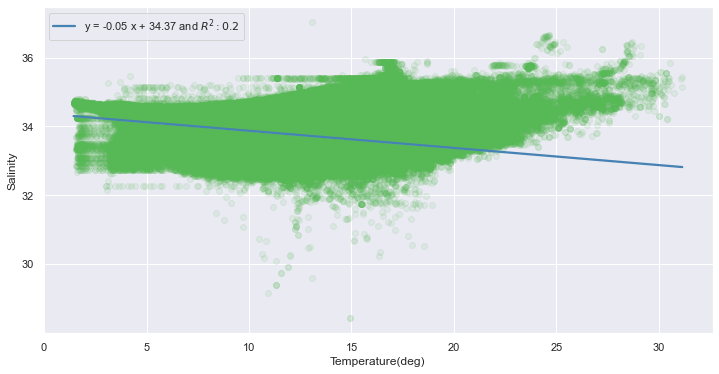

In [ ]:
# Linear Regression

slope, intercept, r_value, p_value, std_err = stats.linregress(bottle_data['Temperature(deg)'], bottle_data['Salinity'])

r_value_squared = r_value**2
sns.set_theme(color_codes=True)
ax = sns.regplot(data=bottle_data, x='Temperature(deg)', y='Salinity',
                 scatter_kws={'alpha': 0.1, 'color':'#57B956'},
                 line_kws={'label':"y = {sl} x + {inter} and $R^2:{rs}$".format(sl=round(slope,2), inter=round(intercept,2), rs=round(r_value_squared,2)), 'color': '#4682b4'})
ax.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()

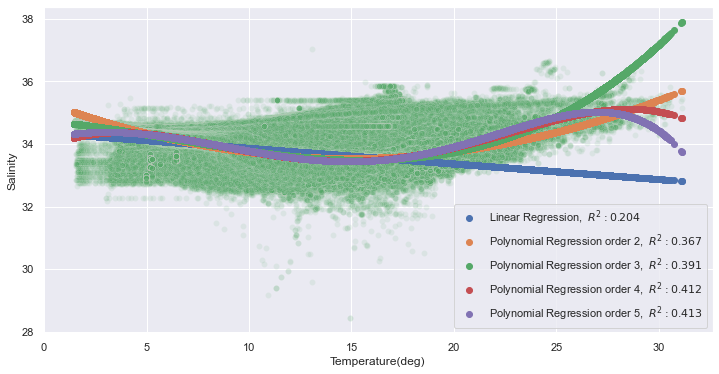

In [ ]:
"""
  Conclusion: The linear regression presents a low R2. Also,
      the plot shows that the linear equation presents a poor fit to the data. 
      So, let's try a polynomial fit."""


""" Perform a Linear and Polynomial Regression to see how the two variables relate"""

from sklearn.metrics import r2_score

ax = sns.scatterplot(data=bottle_data, x='Temperature(deg)', y='Salinity', alpha=0.1, color='g')

z1 = np.poly1d(np.polyfit(bottle_data['Temperature(deg)'], bottle_data['Salinity'], 1))
z2 = np.poly1d(np.polyfit(bottle_data['Temperature(deg)'], bottle_data['Salinity'], 2))
z3 = np.poly1d(np.polyfit(bottle_data['Temperature(deg)'], bottle_data['Salinity'], 3))
z4 = np.poly1d(np.polyfit(bottle_data['Temperature(deg)'], bottle_data['Salinity'], 4))
z5 = np.poly1d(np.polyfit(bottle_data['Temperature(deg)'], bottle_data['Salinity'], 5))

r2_score_z1 = r2_score(bottle_data['Salinity'], z1(bottle_data['Temperature(deg)']))
r2_score_z2 = r2_score(bottle_data['Salinity'], z2(bottle_data['Temperature(deg)']))
r2_score_z3 = r2_score(bottle_data['Salinity'], z3(bottle_data['Temperature(deg)']))
r2_score_z4 = r2_score(bottle_data['Salinity'], z4(bottle_data['Temperature(deg)']))
r2_score_z5 = r2_score(bottle_data['Salinity'], z5(bottle_data['Temperature(deg)']))

plt.plot(bottle_data['Temperature(deg)'], z1(bottle_data['Temperature(deg)']), 'o', label= "Linear Regression,  $R^2:{rs}$".format(rs=round(r2_score_z1,3)))
plt.plot(bottle_data['Temperature(deg)'], z2(bottle_data['Temperature(deg)']), 'o', label= "Polynomial Regression order 2,  $R^2:{rs}$".format(rs=round(r2_score_z2,3)))
plt.plot(bottle_data['Temperature(deg)'], z3(bottle_data['Temperature(deg)']), 'o', label= "Polynomial Regression order 3,  $R^2:{rs}$".format(rs=round(r2_score_z3,3)))
plt.plot(bottle_data['Temperature(deg)'], z4(bottle_data['Temperature(deg)']), 'o', label= "Polynomial Regression order 4,  $R^2:{rs}$".format(rs=round(r2_score_z4,3)))
plt.plot(bottle_data['Temperature(deg)'], z5(bottle_data['Temperature(deg)']), 'o', label= "Polynomial Regression order 5,  $R^2:{rs}$".format(rs=round(r2_score_z5,3)))
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

In [ ]:


r2_ = r2_score
"""

Conclusion: Linear Regression presents the lower R2
, whereas Polynomial Regression of order 4 and 5 present the higher R2.
    However, all results are low fit.  

Conclusion: Linear Regression presents the lower 𝑅2 , whereas Polynomial Regression of order 4 and 5 present the higher 𝑅2 . However, all results are low fit.
"""


In [ ]:
# correlation between the two properties:

bottle_data.corr()


,Temperature(deg),Salinity
Temperature(deg),1.000000,-0.451946
Salinity,-0.451946,1.000000


In [ ]:
"""

Conclusion: Both variables are fully correlated since the corr value is 0.45.
    
    

Main conclusion:

1)Two analysis of linear and polinomial regression were performed. Results are the same.

2)Results showed that polynomial equations of order 4 or 5 are the ones that better fit the results.
However, the fit s not high (has low R2).

3) Results show that the correlation between water temperature and salinity are around 0.45.
"""